# Name: Ramsha Shaikh

Task 2: CAR PRICE PREDICTION WITH MACHINE LEARNING 

In [5]:
# Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns 
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\ramsh\OneDrive\Desktop\car.csv")  # Replace 'your_dataset.csv' with the actual file name/path

# Select features and target variable
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']
target = 'Selling_Price'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for categorical features
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Initialize and train a Linear Regression model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Example prediction for a new data point
new_data_point = pd.DataFrame({
    'Year': [2015],
    'Present_Price': [8.0],
    'Driven_kms': [60000],
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual']
})

predicted_price = model.predict(new_data_point)
print(f"Predicted Price: {predicted_price}")


Mean Squared Error: 11.037822013885801
Mean Absolute Error: 2.1792346035504577
Predicted Price: [4.67263199]


DATA VISUALIZATION

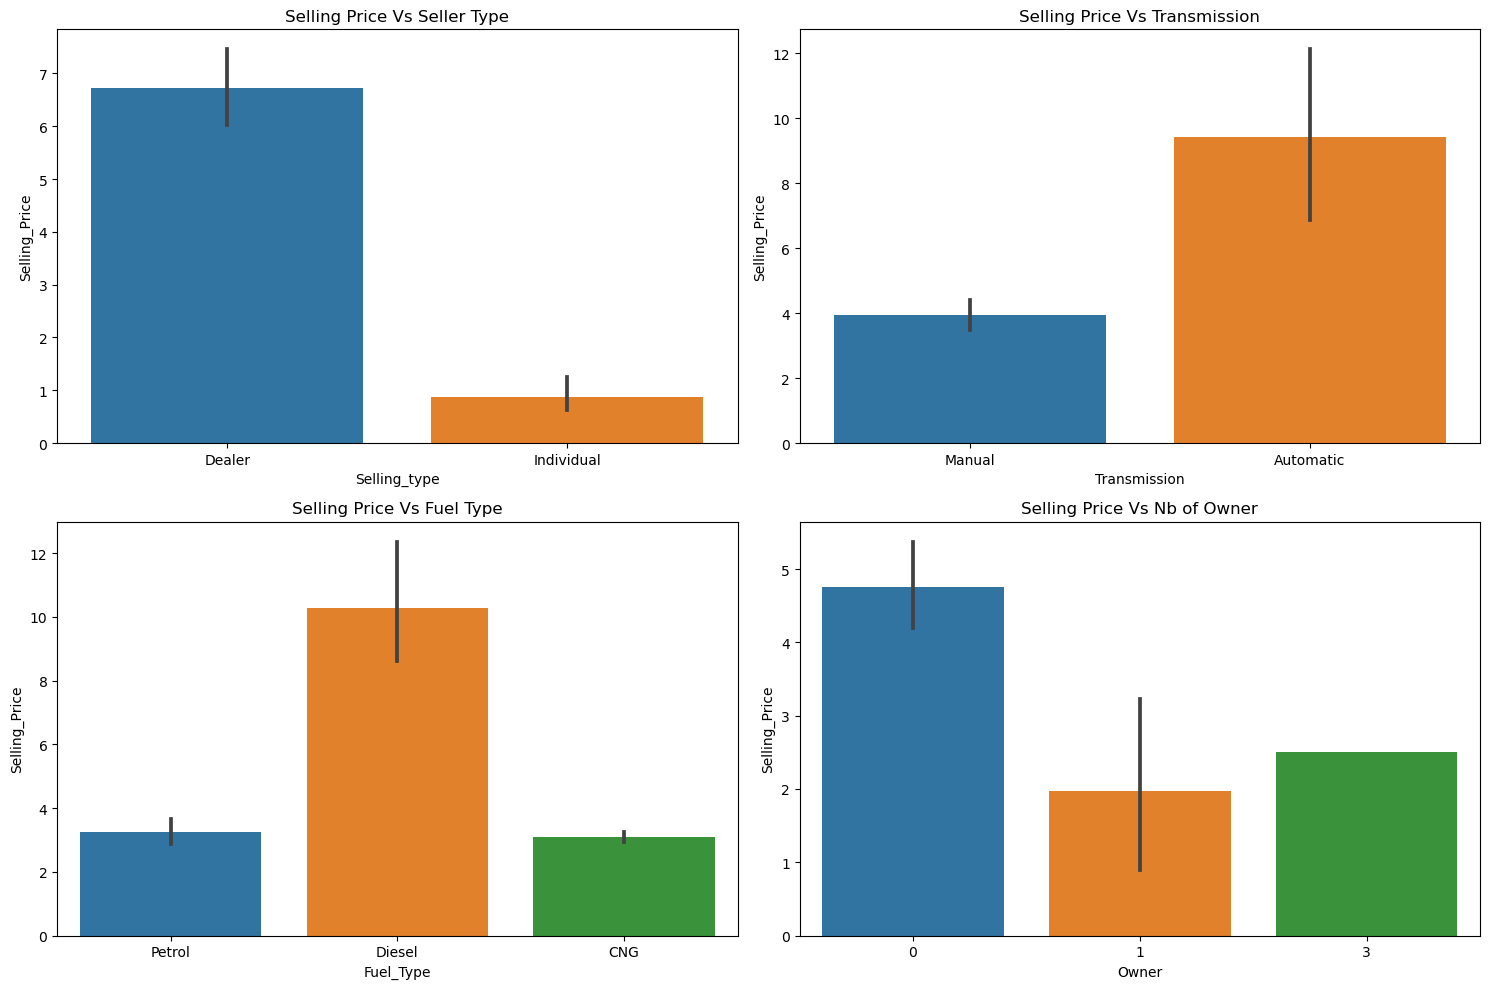

In [7]:
# Seller Type, Transmission and Fuel Type Visualization with target variable

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price') 
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df, x='Transmission', y='Selling_Price') 
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price') 
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price') 
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

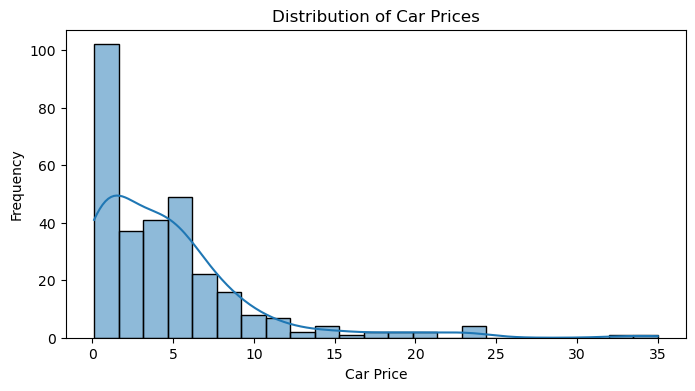

In [10]:
# Visualize the distribution of the target variable (car price)

plt.figure(figsize=(8,4))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

Mean Squared Error: 2.551746712461135e-22
R-squared: 1.0


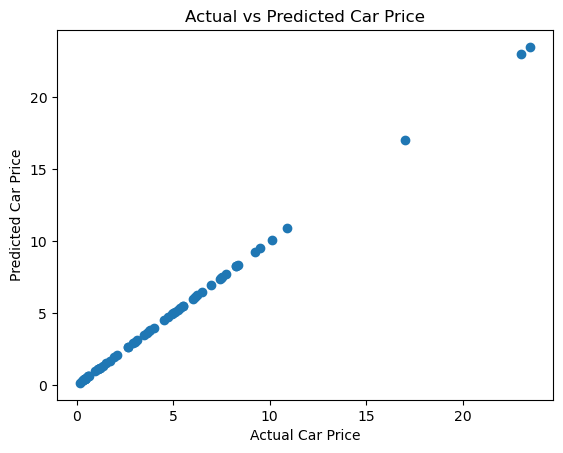

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select features (X) and target variable (y)
Y = df['Selling_Price']
X = df.drop(columns='Selling_Price')

# Encode categorical columns using one-hot encoding
categorical_columns = ["Car_Name", "Fuel_Type", 'Selling_type', 'Transmission']
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')
plt.title('Actual vs Predicted Car Price')
plt.show()
